# Data

Dataset bank.csv terkait dengan kampanye pemasaran langsung dari lembaga perbankan Portugis didasarkan pada panggilan telepon. Seringkali, lebih dari satu kontak ke klien yang sama diperlukan, untuk mengakses apakah produk (deposito berjangka bank) akan ('ya') atau tidak ('tidak') berlangganan. Tujuan klasifikasi adalah untuk memprediksi apakah klien akan berlangganan (ya/tidak) deposito berjangka (variabel y).

# Import Libraries

In [57]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn.tree as tree
import pydotplus
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import svm
from six import StringIO
from sklearn import metrics
from IPython.display import Image
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.linear_model import LogisticRegression

# Read Data

In [58]:
df_bank = pd.read_csv('C:/Users/ASUS/H8_Python_KS09_MSIB _3/Assignment3/dataset/bank.csv' , delimiter=";")
df_bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


# Explaratory & Cleaning Data

In [59]:
#melihat tipe data pada kolom

df_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


dari output diatas, terlihat bahwa data sudah memiliki tipe data yang sesuai. sehingga, langkah selanjutnya adalah melihat dimensi dari data tersebut.

In [60]:
#melihat dimensi dari data

df_bank.shape

(4521, 17)

dari output diatas, terlihat bahwa data ini memiliki 4.521 data dan 17 kolom dengan 2 type data yaitu int64 dan object.

In [61]:
#melihat apakah data mengandung misiing values

df_bank.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

dari output diatas, setelah dilakukan pengecekan missing values terlihat bahwa semua kolom bernilai "0" yang berarti data tidak memiliki missing values.

# Visualisasi Data

## Presentase Client Job

In [62]:
def create_list_number_bank(name_column, list_unique):
    # list_unique = df[name_column].unique()
    
    i = 0
    
    list_number = list()
    
    while i < len(list_unique):
        list_number.append(len(df_bank.loc[df_bank[name_column] == list_unique[i]]))
        i += 1
    
    return list_unique, list_number

def pie_plot(list_number, list_unique):
    plt.figure(figsize=(20,10))
    plt.pie(list_unique, 
        labels=list_number,
        autopct='%1.1f%%', 
        shadow=True, 
        startangle=140)
 
    plt.axis('equal')
    plt.title('Presentase Client Job', y=1.05)
    plt.show()
    return 

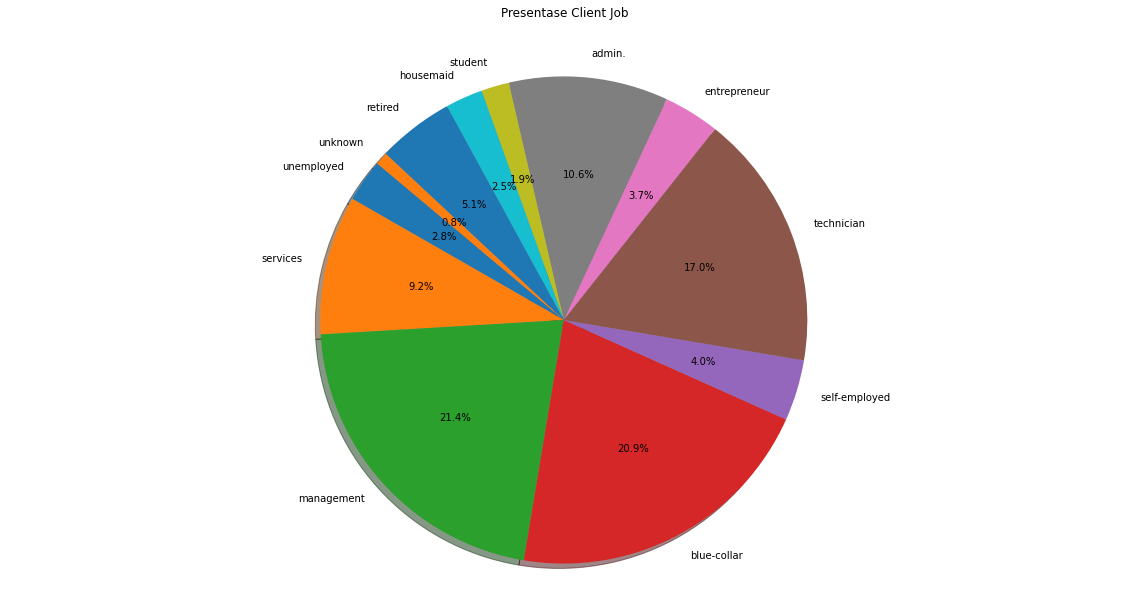

In [63]:
list_unique_job, list_number_job = create_list_number_bank('job',df_bank['job'].unique())
pie_plot(list_unique_job, list_number_job)

In [64]:
#list job

job = list(df_bank["job"].unique())
job

['unemployed',
 'services',
 'management',
 'blue-collar',
 'self-employed',
 'technician',
 'entrepreneur',
 'admin.',
 'student',
 'housemaid',
 'retired',
 'unknown']

In [65]:
#jumlah job

len(job)

12

**Interpretasi**

berdasarkan pie chart diatas, dapat dilihat pekerjaan dari klien lembaga bank portugis ini terdapat 12 kategori pekerjaan, dimana pekerjaan dengan persentase tertinggi yaitu management sebesar 21,4% sedangkan untuk pekerjaan unknown  menjadi presentase terendah sebesar 0,8% karena jenis pekerjaan ini tidak diketahui

## Jumlah Klien yang Memiliki Kredit (Default)

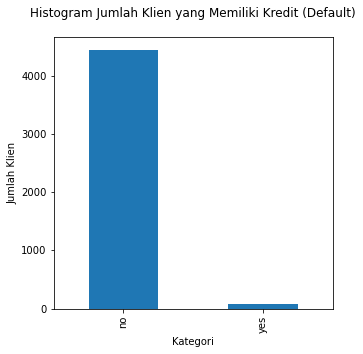

In [66]:
df_default = df_bank['default'].value_counts()
df_default.plot(kind='bar', figsize=(5, 5))
plt.title("Histogram Jumlah Klien yang Memiliki Kredit (Default)", y=1.05)
plt.xlabel('Kategori')
plt.ylabel('Jumlah Klien')
plt.ylim(ymin=0)
plt.show()

In [67]:
df_default

no     4445
yes      76
Name: default, dtype: int64

**Interpretasi**

berdasarkan bar chart diatas, dapat dilihat bahwa jumlah klien yang tidak memiliki kredit paling banyak yaitu 4.445 klien, sedangkan yang memiliki kredit hanya 76 klien.

## Jumlah Klien yang Memiliki Pinjaman Pribadi

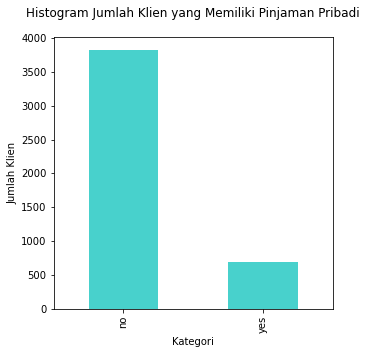

In [68]:
df_loan = df_bank['loan'].value_counts()
df_loan.plot(kind='bar', color='mediumturquoise', figsize=(5,5))
plt.title("Histogram Jumlah Klien yang Memiliki Pinjaman Pribadi", y=1.05)
plt.xlabel('Kategori')
plt.ylabel('Jumlah Klien')
plt.ylim(ymin=0)
plt.show()

In [69]:
df_loan

no     3830
yes     691
Name: loan, dtype: int64

**Interpretasi**

berdasarkan bar chart diatas, dapat dilihat bahwa jumlah klien yang tidak memiliki pinjaman pribadi paling banyak yaitu 3.830 klien, sedangkan yang memiliki pinjaman yaitu 691 klien.

## Jumlah Klien yang Memiliki Deposit

In [70]:
labels = df_bank['y'].unique()
labels

array(['no', 'yes'], dtype=object)

In [71]:
df_deposit = df_bank['y'].value_counts()
df_deposit

no     4000
yes     521
Name: y, dtype: int64

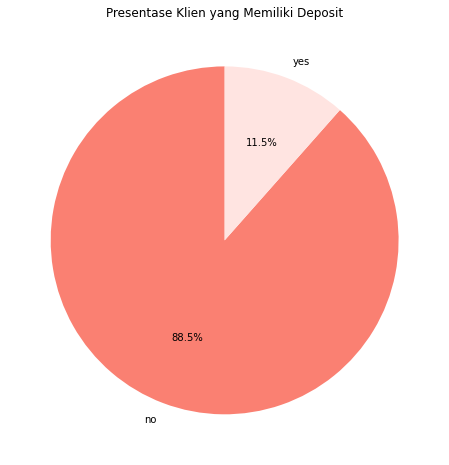

In [72]:
plt.figure(figsize=(8,8))
colors=['salmon', 'mistyrose']
font = {'weight': 'bold', 'size': 10,}
ax = plt.axes()

plt.pie(df_deposit,
        labels=labels,
        colors=colors,
        startangle=90,
        autopct='%1.1f%%')
plt.title("Presentase Klien yang Memiliki Deposit")

plt.show()

**Interpretasi**

berdasarkan pie chart diatas dapat dilihat klien yang telah berlangganan deposit berjangka sebanyak 11.3% atau sekitar 521 klien dan dan 88.5% atau 4.000 klien belum berlangganan deposit.

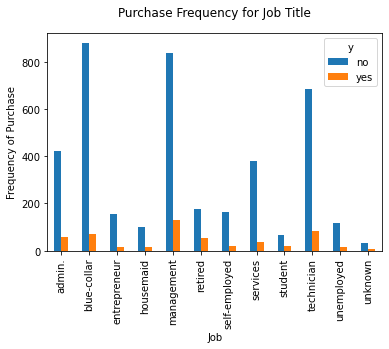

In [73]:
pd.crosstab(df_bank['job'], df_bank['y']).plot(kind='bar') 
plt.title('Purchase Frequency for Job Title', y=1.05)
plt.xlabel('Job')
plt.ylabel('Frequency of Purchase')
plt.savefig('purchase_fre_job')  

**Interpretasi**

berdasarkan plot bar chart diatas, dapat dilihat bahwa frekuensi berlangganan deposit bergantung pada pekerjaan, sehingga pekerjaan merupakan prediktor yang baik dari variabel hasil.

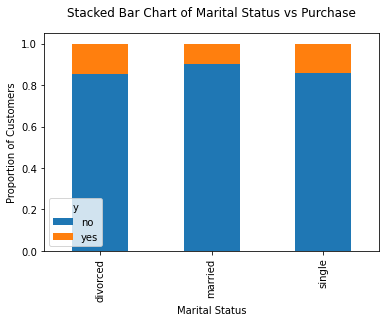

In [74]:
table=pd.crosstab(df_bank.marital, df_bank.y)  
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)  
plt.title('Stacked Bar Chart of Marital Status vs Purchase', y=1.05)  
plt.xlabel('Marital Status')  
plt.ylabel('Proportion of Customers')  
plt.savefig('mariral_vs_pur_stack') 

**Interpretasi**

berdasarkan plot bar chart diatas, dapat dilihat bahwa status perkawinan bukan merupakan prediktor yang kuat untuk variabel hasil.

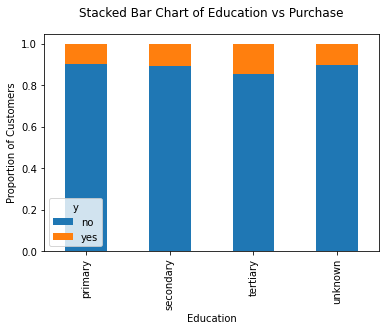

In [75]:
table=pd.crosstab(df_bank.education, df_bank.y)  
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)  
plt.title('Stacked Bar Chart of Education vs Purchase', y=1.05)  
plt.xlabel('Education')  
plt.ylabel('Proportion of Customers')  
plt.savefig('edu_vs_pur_stack')  

**Interpretasi**

berdasarkan plot bar diatas, dapat dilihat bahwa pendidikan merupakan prediktor yang baik dari variabel hasil.

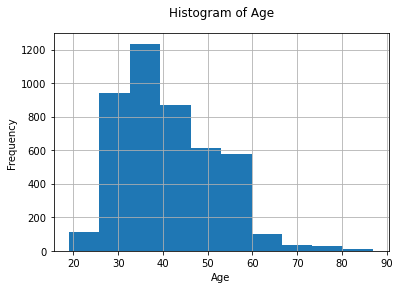

In [76]:
df_bank.age.hist()  
plt.title('Histogram of Age', y=1.05)  
plt.xlabel('Age')  
plt.ylabel('Frequency')  
plt.savefig('hist_age') 

**Interpretasi**

berdasarkan histogram diatas, dapat dilihat bahwa rata-rata klien bank dalam berusia antara 30-40 tahun.

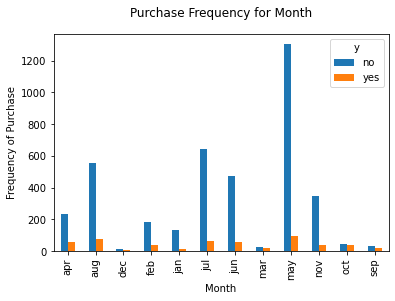

In [77]:
pd.crosstab(df_bank.month,df_bank.y).plot(kind='bar')  
plt.title('Purchase Frequency for Month', y=1.05)  
plt.xlabel('Month')  
plt.ylabel('Frequency of Purchase')  
plt.savefig('pur_fre_month_bar')  

**Interpretasi**

berdasarkan bar chart diatas, dapat dilihat bahwa bulan merupakan prediktor yang baik untuk variabel hasil

# Encoding Kolom

In [78]:
#encode kolom 'y' dari data kategorik menjadi numerik

le = LabelEncoder()
df_bank['y'] = le.fit_transform(df_bank['y'])
df_bank['y'].head()

0    0
1    0
2    0
3    0
4    0
Name: y, dtype: int32

dari hasil output diatas, dapat dilihat bahwa kolom "y" sudah berubah tipe data menjadi numerik atau integer.

# Buat Variabel Dummy

In [79]:
#deklarasi variabel fitur dan variabel target yang akan digunakan
#variabel fitur yaitu kolom age, balance, day, duration, campaign, job, dan marital
#variabel target yaitu kolom y

X = df_bank[['age', 'balance', 'day', 'duration', 'campaign', 'job', 'marital']]
y = df_bank['y']

In [80]:
#ubah kolom kategorik menjadi numerik dengan menggunakan fungsi dummy

X = pd.get_dummies(X)
X.head()

,age,balance,day,duration,campaign,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single
0,30,1787,19,79,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
1,33,4789,11,220,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
2,35,1350,16,185,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
3,30,1476,3,199,4,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
4,59,0,5,226,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0


dari hasil output diatas, dapat dilihat bahwa variabel X sudah berubah tipe data menjadi numerik atau integer.

# Split Data

setelah mendefinisikan variabel X dan y pada tahap sebelumnya, kita dapat langsung mengimplementasikan train/test split menjadi 70% training dan 30% testing.

In [81]:
#split data menjadi 70% training dan 30% testing

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=124)

1. X_train: untuk menampung data source yang akan dilatih
2. X_test: untuk menampung data target yang akan dilatih
3. y_train: untuk menampung data source yang akan digunakan untuk testing
4. y_test: untuk menampung data target yang akan digunakan untuk testing
5. parameter test_size digunakan untuk mendefinisikan ukuran data testing sebesar 30%
6. parameter random_state digunakan jika kita mengulang proses running maka hasilnya akan berubah-ubah. sehingga gunakan random state dengan angka berapas aja berupa integer. disini saya menggunakan random_state = 3

# Logistic Regression

**Pre-processing**

In [82]:
#menentukan model klasifikasi
model = LogisticRegression()

#training model
model.fit(X_train, y_train)

#prediksi respon untuk dataset test
y_pred = model.predict(X_test)

D:\Putrialtikaaa\Aplikasi\Anaconda1\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**Confusion Matriks**

In [83]:
#confusion matriks

matrix = confusion_matrix(y_test, y_pred)
print(matrix)

[[1188   15]
 [ 134   20]]


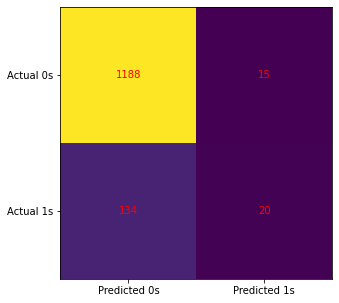

In [84]:
#visualisasi confusion matriks

cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(5,5))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0,1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0,1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')

plt.show()

**Evaluasi Model**

In [85]:
#melihat nilai accuracy

print(metrics.accuracy_score(y_test, y_pred))

0.8901989683124539


In [86]:
#laporan klasifikasi yang komprehensif

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94      1203
           1       0.57      0.13      0.21       154

    accuracy                           0.89      1357
   macro avg       0.74      0.56      0.58      1357
weighted avg       0.86      0.89      0.86      1357



**Kesimpulan**

kesimpulan yang didapat dari klasifikasi menggunakan metode Regresi Logistik sebagai berikut:
1. nilai akurasi terbaik dari metode Regresi Logistik sebesar 0.89 atau 89%.
2. confusion matrix menghasilkan 1187 + 20 prediksi benar dan 134 + 16 prediksi salah.
  * 1187 prediksi negatif benar = 1180 pengamatan pertama adalah 0 atau no yang diprediksi dengan benar.
  * 134 prediksi negatif salah = 127 pengamatan yang salah sebagai 0 atau no.
  * 16  prediksi positif salah = 21 pengamatan keempat adalah 0 yang salah diprediksi sebagai 1 atau yes.
  * 20 prediksi positif benar = 29 pengamatan terakhir adalah yang diprediksi dengan benar sebagai 1 atau yes.

# K-Nearest Neighbors

**Pre-processing**

In [87]:
#menentukan model klasifikasi
KNN = KNeighborsClassifier()

#training model
KNN.fit(X_train, y_train)

#prediksi respon untuk dataset test
y_pred1 = KNN.predict(X_test)

**Confusion Matriks**

In [88]:
#confusion matriks

matrix = confusion_matrix(y_test, y_pred1)
print(matrix)

[[1169   34]
 [ 128   26]]


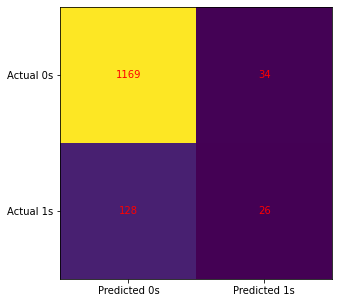

In [89]:
#visualisasi confusion matriks

cm = confusion_matrix(y_test, y_pred1)

fig, ax = plt.subplots(figsize=(5,5))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0,1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0,1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')

plt.show()

**Evaluasi Model**

In [90]:
#melihat nilai accuracy

print(metrics.accuracy_score(y_test, y_pred1))

0.8806190125276345


In [91]:
#laporan klasifikasi yang lebih lengkap

print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.90      0.97      0.94      1203
           1       0.43      0.17      0.24       154

    accuracy                           0.88      1357
   macro avg       0.67      0.57      0.59      1357
weighted avg       0.85      0.88      0.86      1357



**Kesimpulan**

kesimpulan yang didapat dari klasifikasi menggunakan metode K-Nearest Neighbors sebagai berikut:
1. nilai akurasi terbaik dari metode K-Nearest Neighbors sebesar 0.88 atau 88%.
2. confusion matrix menghasilkan 1169 + 26 prediksi benar dan 128 + 34 prediksi salah.
  * 1169 prediksi negatif benar = 1151 pengamatan pertama adalah 0 atau no yang diprediksi dengan benar.
  * 128 prediksi negatif salah = 129 pengamatan yang salah sebagai 0 atau no.
  * 34 prediksi positif salah = 50 pengamatan keempat adalah 0 yang salah diprediksi sebagai 1 atau yes.
  * 26 prediksi positif benar = 27 pengamatan terakhir adalah yang diprediksi dengan benar sebagai 1 atau yes.

# Support Vector Machine

**Pre-processing**

In [92]:
#menentukan model klasifikasi
svm_model = svm.SVC()

#training model
svm_model.fit(X_train, y_train)

#prediksi respon untuk dataset test
y_pred2 = svm_model.predict(X_test)

**Confusion Matriks**

In [93]:
#confusion matriks

matrix = confusion_matrix(y_test, y_pred2)
print(matrix)

[[1203    0]
 [ 154    0]]


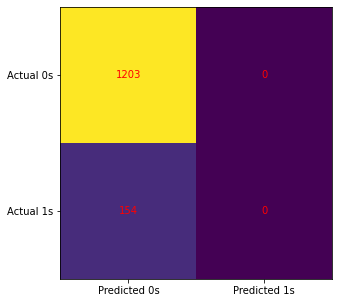

In [94]:
#visualisasi confusion matriks

cm = confusion_matrix(y_test, y_pred2)

fig, ax = plt.subplots(figsize=(5,5))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0,1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0,1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')

plt.show()

**Evaluating Model**

In [95]:
#melihat nilai accuracy

print(metrics.accuracy_score(y_test, y_pred2))

0.8865143699336773


In [96]:
#laporan klasifikasi yang lebih lengkap

print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94      1203
           1       0.00      0.00      0.00       154

    accuracy                           0.89      1357
   macro avg       0.44      0.50      0.47      1357
weighted avg       0.79      0.89      0.83      1357



D:\Putrialtikaaa\Aplikasi\Anaconda1\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Putrialtikaaa\Aplikasi\Anaconda1\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Putrialtikaaa\Aplikasi\Anaconda1\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Kesimpulan**

kesimpulan yang didapat dari klasifikasi menggunakan metode Support Vector Machine sebagai berikut:
1. nilai akurasi terbaik dari metode Support Vector Machine sebesar 0.89 atau 89%.
2. confusion matrix menghasilkan 1203 + 0 prediksi benar dan 154 + 0 prediksi salah.
  * 1203 prediksi negatif benar = 1201 pengamatan pertama adalah 0 atau no yang diprediksi dengan benar.
  * 154 prediksi negatif salah = 156 pengamatan yang salah sebagai 0 atau no.
  * 0 prediksi positif salah = tidak ada pengamatan keempat adalah 0 yang salah diprediksi sebagai 1 atau yes.
  * 0 prediksi positif benar = tidak ada pengamatan terakhir adalah yang diprediksi dengan benar sebagai 1 atau yes.

# Decision Tree

**Pre-processing**

In [97]:
#menentukan model klasifikasi
dt = tree.DecisionTreeClassifier()

#training model
dt.fit(X_train, y_train)

#prediksi respon untuk dataset test
y_pred3 = dt.predict(X_test)

**Confusion Matriks**

In [98]:
#confusion matriks

matrix = confusion_matrix(y_test, y_pred3)
print(matrix)

[[1104   99]
 [ 102   52]]


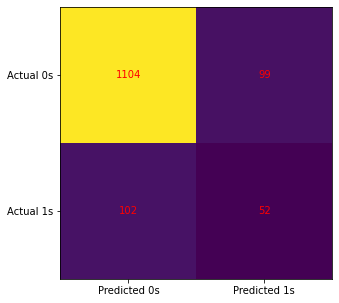

In [99]:
#visualisasi confusion matriks

cm = confusion_matrix(y_test, y_pred3)

fig, ax = plt.subplots(figsize=(5,5))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0,1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0,1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')

plt.show()

**Evaluasi Model**

In [100]:
#melihat nilai accuracy

print(metrics.accuracy_score(y_test, y_pred3))

0.8518791451731761


In [101]:
#laporan klasifikasi yang lebih lengkap

print(classification_report(y_test, y_pred3))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92      1203
           1       0.34      0.34      0.34       154

    accuracy                           0.85      1357
   macro avg       0.63      0.63      0.63      1357
weighted avg       0.85      0.85      0.85      1357



**Kesimpulan**

kesimpulan yang didapat dari klasifikasi menggunakan metode Decision Tree sebagai berikut:
1. nilai akurasi terbaik dari metode Decision Tree sebesar 0.84 atau 84%.
2. confusion matrix menghasilkan 1092 + 53 prediksi benar dan 101 + 111 prediksi salah.
  * 1092 prediksi negatif yang benar = 1078 pengamatan pertama adalah 0 atau no yang diprediksi dengan benar.
  * 101 prediksi negatif salah = 94 pengamatan yang salah sebagai 0 atau no.
  * 111 prediksi positif yang salah = 123 pengamatan keempat adalah 0 yang salah diprediksi sebagai 1 atau yes.
  * 53 prediksi positif yang benar = 62 pengamatan terakhir adalah yang diprediksi dengan benar sebagai 1 atau yes.

# Random Forest

**Pre-processing**

In [102]:
#menentukan model klasifikasi
rf = RandomForestClassifier()

#training model
rf.fit(X_train, y_train)

#prediksi respon untuk dataset test
y_pred4 = rf.predict(X_test)

**Confusion Matriks**

In [103]:
#confusion matriks

matrix = confusion_matrix(y_test, y_pred4)
print(matrix)

[[1180   23]
 [ 132   22]]


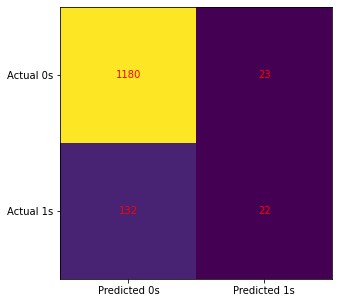

In [104]:
#visualisasi confusion matriks

cm = confusion_matrix(y_test, y_pred4)

fig, ax = plt.subplots(figsize=(5,5))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0,1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0,1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')

plt.show()

**Evaluasi Model**

In [105]:
#melihat nilai accuracy

print(metrics.accuracy_score(y_test, y_pred4))

0.8857774502579219


In [106]:
#laporan klasifikasi yang lebih lengkap

print(classification_report(y_test, y_pred4))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94      1203
           1       0.49      0.14      0.22       154

    accuracy                           0.89      1357
   macro avg       0.69      0.56      0.58      1357
weighted avg       0.85      0.89      0.86      1357



**Kesimpulan**

kesimpulan yang didapat dari klasifikasi menggunakan metode Random Forest sebagai berikut:
1. nilai akurasi terbaik dari metode Random Forest sebesar 0.89 atau 89%.
2. confusion matrix menghasilkan 1183 + 21 prediksi benar dan 133 + 20 prediksi salah.
  * 1183 prediksi negatif yang benar = 1176 pengamatan pertama adalah 0 atau no yang diprediksi dengan benar.
  * 133 prediksi negatif salah = 125 pengamatan yang salah sebagai 0 atau no.
  * 20 prediksi positif yang salah = 25 pengamatan keempat adalah 0 yang salah diprediksi sebagai 1 atau yes.
  * 21 prediksi positif yang benar = 31 pengamatan terakhir adalah yang diprediksi dengan benar sebagai 1 atau yes.

# Naive Bayes

**Pre-processing**

In [107]:
#menentukan model klasifikasi
nb = GaussianNB()

#training model
nb.fit(X_train, y_train)

#prediksi respon untuk dataset test
y_pred5 = nb.predict(X_test)

**Confusion Matriks**

In [108]:
#confusion matriks

matrix = confusion_matrix(y_test, y_pred5)
print(matrix)

[[1093  110]
 [ 104   50]]


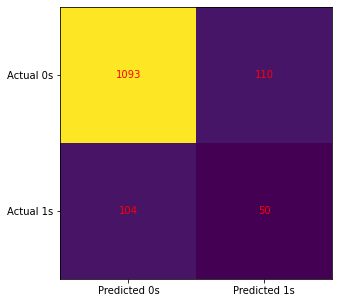

In [109]:
#visualisasi confusion matriks

cm = confusion_matrix(y_test, y_pred5)

fig, ax = plt.subplots(figsize=(5,5))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0,1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0,1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')

plt.show()

**Evaluasi Model**

In [110]:
#melihat nilai accuracy

print(metrics.accuracy_score(y_test, y_pred5))

0.8422991893883567


In [111]:
#laporan klasifikasi yang lebih lengkap

print(classification_report(y_test, y_pred5))

              precision    recall  f1-score   support

           0       0.91      0.91      0.91      1203
           1       0.31      0.32      0.32       154

    accuracy                           0.84      1357
   macro avg       0.61      0.62      0.61      1357
weighted avg       0.84      0.84      0.84      1357



**Kesimpulan**

kesimpulan yang didapat dari klasifikasi menggunakan metode Naive Bayes sebagai berikut:
1. nilai akurasi terbaik dari metode Naive Bayes sebesar 0.84 atau 84%.
2. confusion matrix menghasilkan 1093 + 50 prediksi benar dan 104 + 110 prediksi salah.
  * 1093 prediksi negatif benar = 1076 pengamatan pertama adalah 0 atau no yang diprediksi dengan benar.
  * 104 prediksi negatif salah = 103 pengamatan yang salah sebagai 0 atau no.
  * 110 prediksi positif salah = 130 pengamatan keempat adalah 0 yang salah diprediksi sebagai 1 atau yes.
  * 50 prediksi positif benar = 53 pengamatan terakhir adalah yang diprediksi dengan benar sebagai 1 atau yes.

# Perbandingan Algoritma

In [112]:
print('Accuracy of Logistic Regression: {:.5f}'.format(metrics.accuracy_score(y_test, y_pred)))
print('Accuracy of KNN: {:.5f}'.format(metrics.accuracy_score(y_test, y_pred1)))
print('Accuracy of SVM: {:.5f}'.format(metrics.accuracy_score(y_test, y_pred2)))
print('Accuracy of Decision Tree: {:.5f}'.format(metrics.accuracy_score(y_test, y_pred3)))
print('Accuracy of Random forest: {:.5f}'.format(metrics.accuracy_score(y_test, y_pred4)))
print('Accuracy of Naive Bayes: {:.5f}'.format(metrics.accuracy_score(y_test, y_pred5)))

Accuracy of Logistic Regression: 0.89020
Accuracy of KNN: 0.88062
Accuracy of SVM: 0.88651
Accuracy of Decision Tree: 0.85188
Accuracy of Random forest: 0.88578
Accuracy of Naive Bayes: 0.84230


# Kesimpulan

berdasarkan output perbandingan 6 algoritma diatas, untuk mencari algoritma yang baik dalam melakukan prediksi apakah klien akan berlangganan (ya/tidak) deposito berjangka (variabel y) dapat dilihat dari nilai akurasi yang paling tinggi dengan menggunakan data training 70% dan testing 30%. sehingga, didapat algoritma Logistic Regression memiliki nilai akurasi yang paling tinggi sebesar 0.88946 atau 88.9% artinya model algoritma Logistic Regression dapat memprediksi dengan akurat.